In [8]:
"""
to generate result figures of different evaluation metrics
"""

import sys
sys.path.insert(0, '..')

import pandas as pd
import pathlib
import numpy as np
from src.utils.utils import get_filenames_of_path, save_csv

res_dir = pathlib.Path('../res/')
res_files = get_filenames_of_path(res_dir)
# print(res_files)

dfs = {}
for file in res_files:
    dfs[file.stem] = pd.read_csv(file)
# print(dfs)


In [9]:
## calculate mean and SE

stats = {}
for name, df in dfs.items():
    
    means = df.groupby('k').mean()
    means['SASSAD_rmse'] = np.sqrt(means['SASSAD_se'])
    means['TISS_rmse'] = np.sqrt(means['TISS_se'])
    means['EASI_rmse'] = np.sqrt(means['EASI_se'])
    means['cra_rmse'] = np.sqrt(means['cra_se'])
    means['dry_rmse'] = np.sqrt(means['dry_se'])
    means['ery_rmse'] = np.sqrt(means['ery_se'])
    means['exc_rmse'] = np.sqrt(means['exc_se'])
    means['exu_rmse'] = np.sqrt(means['exu_se'])
    means['lic_rmse'] = np.sqrt(means['lic_se'])
    means['oed_rmse'] = np.sqrt(means['oed_se'])

    mean = means.mean()
    se = means.sem()
#     print(se)
    
    stat = {}
    stat.update({'SASSAD_rmse_m': mean['SASSAD_rmse'], 'TISS_rmse_m': mean['TISS_rmse'], 'EASI_rmse_m': mean['EASI_rmse']})
    stat.update({'SASSAD_rmse_se': se['SASSAD_rmse'], 'TISS_rmse_se': se['TISS_rmse'], 'EASI_rmse_se': se['EASI_rmse']})
    stat.update({'SASSAD_mae_m': mean['SASSAD_ae'], 'TISS_mae_m': mean['TISS_ae'], 'EASI_mae_m': mean['EASI_ae']})
    stat.update({'SASSAD_mae_se': se['SASSAD_ae'], 'TISS_mae_se': se['TISS_ae'], 'EASI_mae_se': se['EASI_ae']})
    stat.update({'SASSAD_rmae_m': mean['SASSAD_ae']/18, 'TISS_rmae_m': mean['TISS_ae']/9, 'EASI_rmae_m': mean['EASI_ae']/12})
    stat.update({'SASSAD_rmae_se': se['SASSAD_ae']/18, 'TISS_rmae_se': se['TISS_ae']/9, 'EASI_rmae_se': se['EASI_ae']/12})
    stat.update({'SASSAD_rps_m': mean['SASSAD_rps'], 'TISS_rps_m': mean['TISS_rps'], 'EASI_rps_m': mean['EASI_rps']})
    stat.update({'SASSAD_rps_se': se['SASSAD_rps'], 'TISS_rps_se': se['TISS_rps'], 'EASI_rps_se': se['EASI_rps']})
    stat.update({'cra_rmse_m': mean['cra_rmse'], 'dry_rmse_m': mean['dry_rmse'], 'ery_rmse_m': mean['ery_rmse'], 'exc_rmse_m': mean['exc_rmse'], 'exu_rmse_m': mean['exu_rmse'], 'lic_rmse_m': mean['lic_rmse'], 'oed_rmse_m': mean['oed_rmse']})
    stat.update({'cra_rmse_se': se['cra_rmse'], 'dry_rmse_se': se['dry_rmse'], 'ery_rmse_se': se['ery_rmse'], 'exc_rmse_se': se['exc_rmse'], 'exu_rmse_se': se['exu_rmse'], 'lic_rmse_se': se['lic_rmse'], 'oed_rmse_se': se['oed_rmse']})
    stat.update({'cra_mae_m': mean['cra_ae'], 'dry_mae_m': mean['dry_ae'], 'ery_mae_m': mean['ery_ae'], 'exc_mae_m': mean['exc_ae'], 'exu_mae_m': mean['exu_ae'], 'lic_mae_m': mean['lic_ae'], 'oed_mae_m': mean['oed_ae']})
    stat.update({'cra_mae_se': se['cra_ae'], 'dry_mae_se': se['dry_ae'], 'ery_mae_se': se['ery_ae'], 'exc_mae_se': se['exc_ae'], 'exu_mae_se': se['exu_ae'], 'lic_mae_se': se['lic_ae'], 'oed_mae_se': se['oed_ae']})
#     print(stat)

    stats[name] = stat
    
# print(stats)
stats_df = pd.DataFrame.from_dict(stats, orient='index')
# print(stats_df)
    
# save_csv(stats_df, 'stats.csv', 'w')
stats_df.to_csv("stats.csv",index=True)

In [12]:
## choose models and inputs

models = [
    'ASCORAD (Pred.)',
    'EczemaNet (Pred.)',
#     'EfficientNet',
#     '-Dropout',
#     '2FC',
#     '2FC (-Dropout)',
#     '1FC',
#     '2FC SPP',
#     'ASCORAD (Pred.) Adam',
#     'SPP+Padding',
#     'SPP+Padding1',
#     'SPP+Padding2',
#     'SPP+Padding3',
#     'SPP+Padding4',
#     'SPP+Padding5',
#     'SPP+Padding6',
#     'SPP+Padding7',
#     'SPP+Padding8',
#     'SPP+Padding9',
#     'SPP+Padding10', 
#     'SPP+Padding11', 
#     'SPP+Padding12',
#     'SPP+Padding13',
#     'SPP+Padding14',
#     '2FC SPP[1]+Padding',
#     '2FC SPP[1]+Padding1',
#     '2FC SPP[2,1]+Padding',
#     '2FC SPP+Padding',
#     '2FC Padding',
#     '2FC Ratio',
    '2FC Padding AD',
]

# inputs = [
#     'SWET (wBG-Crop-AD)',
# #     'SWET (wBG-Crop-Skin)',
#     'SWET (nBG-Crop-AD)',
# #     'SWET (nBG-Crop-Skin)',
#     'SWET (nBG-Whole-AD)', 
#     'SWET (nBG-Whole-Skin)', 
# #     'SWET (wBG-Whole)',
#     ]

inputs = [
#     'SWET (wBG-Crop-AD)',
#     'SWET (wBG-Crop-Skin)',
#     'SWET (nBG-Crop-AD)',
#     'SWET (nBG-Crop-Skin)',
#     'SWET (nBG-Whole-AD)', 
#     'SWET (nBG-Whole-Skin)', 
#     'SWET (wBG-Whole)',

#     'SWET (nBG-Crop-Skin)',
#     'SWET (nBG-Crop-AD)',
    'SWET (nBG-Whole-Skin)', 
#     'SWET (wBG-Whole)',
#     'TLA (nBG-Crop-Skin)',
    'TLA (nBG-Whole-Skin)', 
#     'TLA (wBG-Whole)',
    
#     'SWET (nBG-Whole-Skin)',
#     'SWET (nBG-Whole-Skin) + Gaussian Noise',
#     'SWET (nBG-Whole-Skin) + ISO Noise',
#     'SWET (nBG-Whole-Skin) + Gaussian Blur',
#     'SWET (nBG-Whole-Skin) + Motion Blur',
#     'SWET (nBG-Whole-Skin) + Brightness Change',
#     'SWET (nBG-Whole-Skin) + Contrast Change',
#     'SWET (nBG-Whole-Skin) + Pixelate',
    
#     'TLA (nBG-Whole-Skin)', 
#     'TLA (nBG-Whole-Skin) + Gaussian Noise',
#     'TLA (nBG-Whole-Skin) + ISO Noise',
#     'TLA (nBG-Whole-Skin) + Gaussian Blur',
#     'TLA (nBG-Whole-Skin) + Motion Blur',
#     'TLA (nBG-Whole-Skin) + Brightness Change',
#     'TLA (nBG-Whole-Skin) + Contrast Change',
#     'TLA (nBG-Whole-Skin) + Pixelate',
    ]

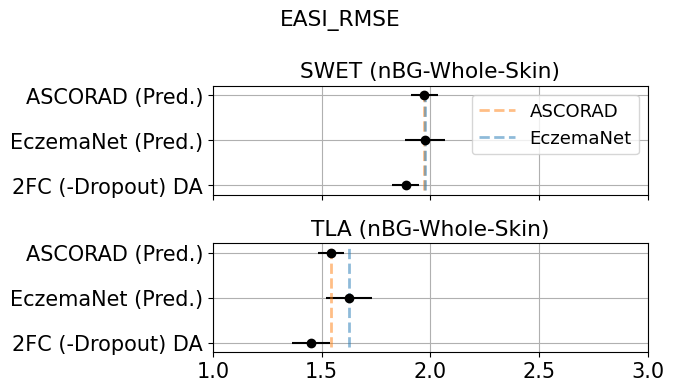

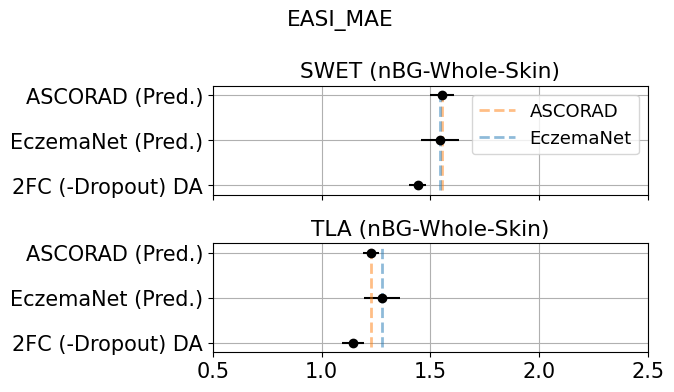

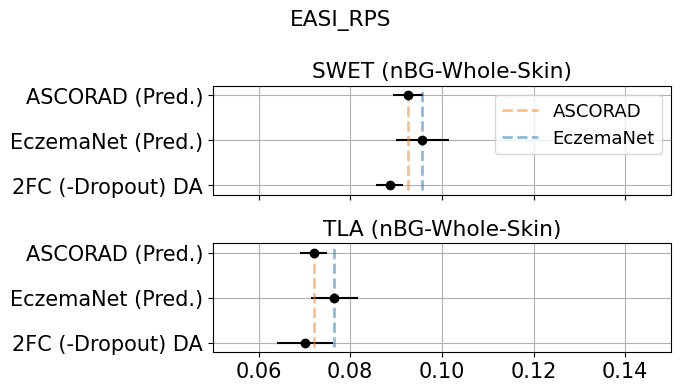

In [17]:
## plot

import matplotlib.pyplot as plt
import math

score = 'EASI'
metrics = ['RMSE', 'MAE', 'RPS']
xmins = [1.0, 0.5, 0.05]
xmaxs = [3.0, 2.5, 0.15]

xs = []

for i_m, metric in enumerate(metrics):
    n_in = len(inputs)
    fig, axs = plt.subplots(n_in)
    fig.suptitle(score+'_'+metric)
    for i_in in range(n_in):
        x = []
        x_err = []
        
        y = models
        for m in models:
#         y = models if inputs[i_in]!='SWET (nBG-Crop-AD)' else models[:2]
#         for m in models if inputs[i_in]!='SWET (nBG-Crop-AD)' else models[:2]:

#             name = m + ' ' + inputs[i_in] + ' 0'
#             try:
#                 attempt = stats[name]
#             except:
#                 name = m + ' ' + inputs[i_in]
            name = m + ' ' + inputs[i_in]

            x.append(stats[name][score+'_'+metric.lower()+'_m'])
            x_err.append(stats[name][score+'_'+metric.lower()+'_se'])
        
        if len(y) == 3:
            y2 = ['ASCORAD (Pred.)', 'EczemaNet (Pred.)', '2FC (-Dropout) DA']
        else:
            y2 = ['ASCORAD (Pred.)', 'EczemaNet (Pred.)']
        axs[i_in].errorbar(x[::-1], y2[::-1], ecolor='k', fmt='ok', xerr=x_err[::-1])
#         print(y)
#         print(x)
#         print(x_err)
#         xs.append(x)

        ymin, ymax = axs[i_in].get_ylim()
        refs = [stats['ASCORAD (Pred.)' + ' ' + inputs[i_in]][score+'_'+metric.lower()+'_m'], 
                stats['EczemaNet (Pred.)' + ' ' + inputs[i_in]][score+'_'+metric.lower()+'_m']]
        axs[i_in].vlines(x=refs[0], ymin=ymin, ymax=ymax, colors='tab:orange', ls='--', lw=2, alpha=0.5, label='ASCORAD')
        axs[i_in].vlines(x=refs[1], ymin=ymin, ymax=ymax, colors='tab:blue', ls='--', lw=2, alpha=0.5, label='EczemaNet')

        axs[i_in].set_title(inputs[i_in])
        if i_in == 0:
            axs[i_in].legend(loc='best')

        axs[i_in].grid(visible=True)
        axs[i_in].axis(xmin = xmins[i_m], xmax = xmaxs[i_m])
        # plt.axis(ymin = -1, ymax = 4)
        axs[i_in].tick_params(axis='both', labelsize=15)

    for ax in axs.flat:
        ax.label_outer()


    plt.rcParams.update({'font.size': 13})
#     plt.rcParams["figure.figsize"] = (7,10)
#     plt.rcParams["figure.figsize"] = (7,6)
#     plt.rcParams["figure.figsize"] = (7,7)
#     plt.rcParams["figure.figsize"] = (7,6.5)
#     plt.rcParams["figure.figsize"] = (7,6.5)
#     plt.rcParams["figure.figsize"] = (7,4.5)
#     plt.rcParams["figure.figsize"] = (7,10)
#     plt.rcParams["figure.figsize"] = (7,9.3)
    plt.rcParams["figure.figsize"] = (7,4)
    fig.tight_layout()

    plt.show()
    # plt.savefig('IoU.png', bbox_inches='tight')
    
#     xs = np.array(xs)
#     xs = 100 * (xs[1:] - xs[0]) / xs[0]
#     mean = np.mean(xs, axis=0)
#     se = np.std(xs, axis=0)/math.sqrt(7)
#     print(mean)
#     print(se)
#     xs = []